# Spot Density Experiment

## Objective:
Explore the limits of spot density that workers can reasonably handle without and with the help of a method to sort clusters in dense areas utilizing worker ID.

## Images:
The eight images below represent two different mean SNR values and four different spot densities chosen to represent the density levels we've seen in real images. Since the coordinates of the spots are sampled from a uniform random distribution within valid pixels (restricted by a global intensity threshold), by the Central Limit Theorem, the nearest neighbor distances between spots are normally distributed.

## Planned usage of the annotation data:
- Worker sensitivity and specificity will be analyzed for each image (to explore the limits of spot density that workers can reasonably handle **without** the help of a method to sort clusters in dense areas utilizing worker ID).
- These annotations will also be useful in developing the method to sort out clusters based on worker ID in dense areas, which is currently a work in progress. Then I'll be able to explore the limits of spot density that workers can reasonably handle **with** the help of this method.

In [1]:
from SpotImage import SpotImage
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KDTree
from matplotlib.lines import Line2D
import math

"""
Instantiate the SpotImage.
"""

bg_img_filename = 'MAX_ISP_300_2.tif'
cmap = 'gray'
img_sz = 300
patch_sz = 11
spot_sigma = 2
spot_shape_params = ['2D_Gauss', spot_sigma]

brightness_bias = False    
brightness_bias_dial = 0
biasing_method = None
global_intensity_dial = 2.5   # raise the threshold found by Otsu's

si = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, spot_shape_params, brightness_bias, brightness_bias_dial, biasing_method, global_intensity_dial)

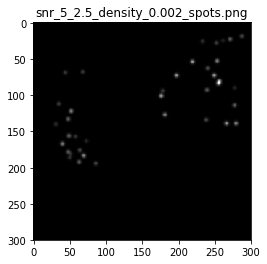

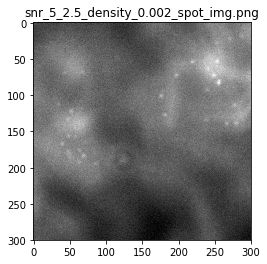

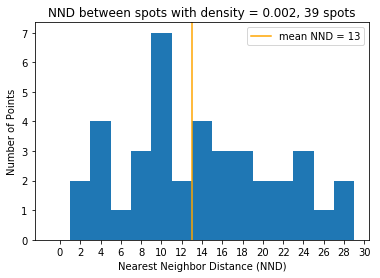

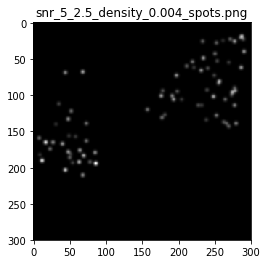

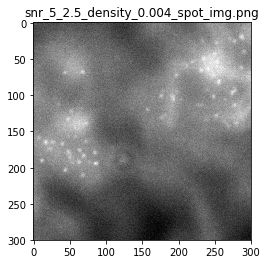

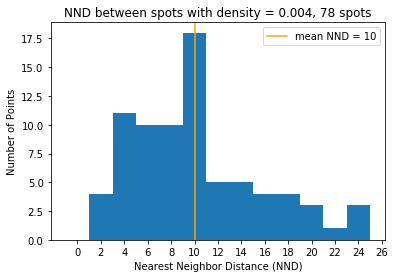

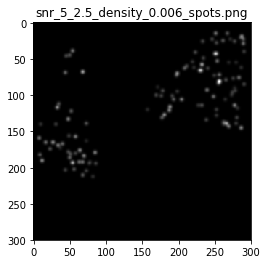

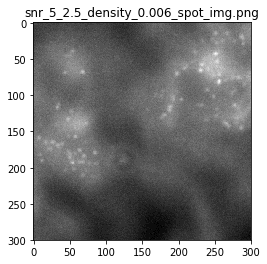

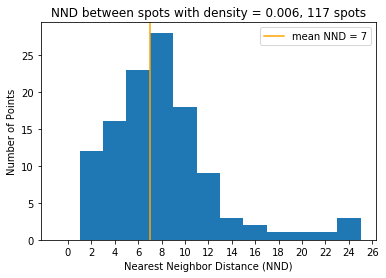

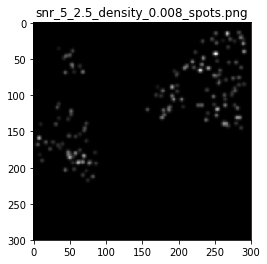

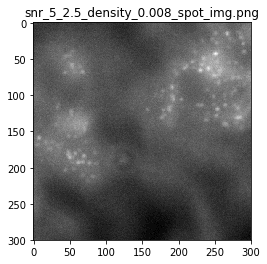

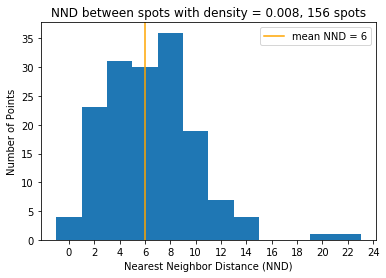

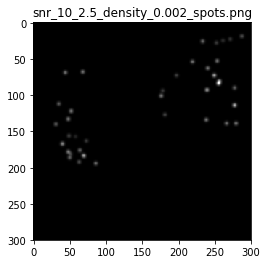

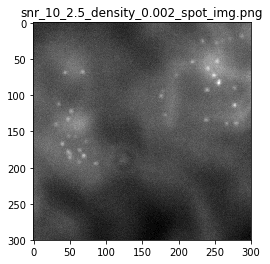

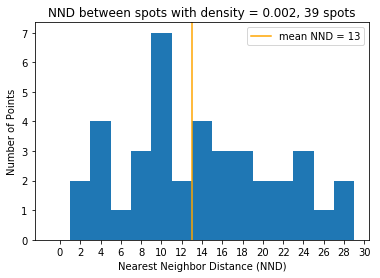

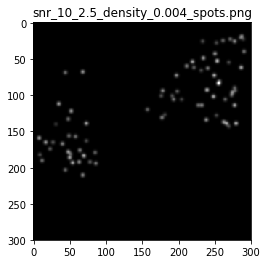

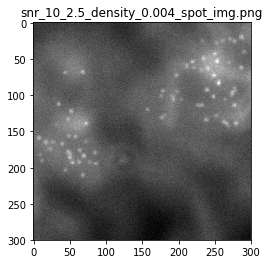

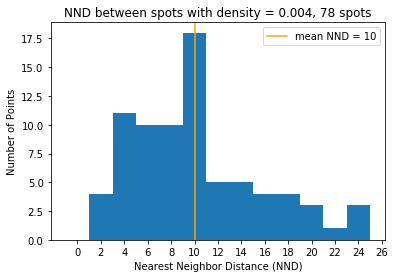

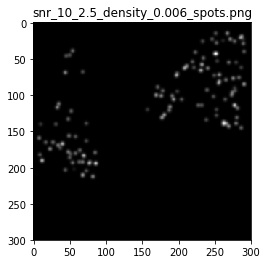

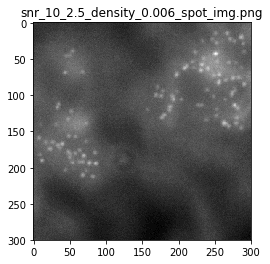

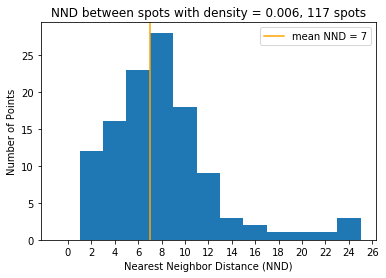

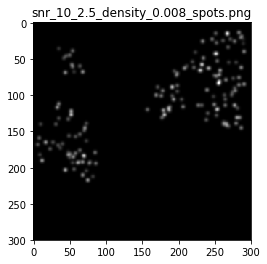

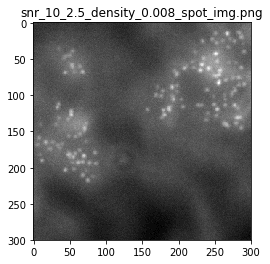

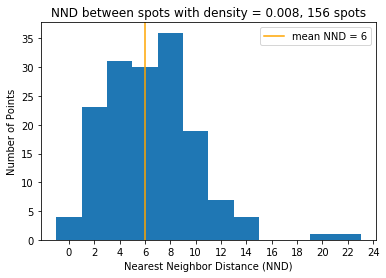

In [2]:
plot_spots = True
plot_img = True
save_spots = True
save_img = True
brightness_bias = False

num_spots = 150
snr_sigma = 2.5
snr_threshold = 3

snr_mu_list = [5,10]
density_list = [0.002, 0.004, 0.006, 0.008]

for snr_mu in snr_mu_list:
    snr_distr_params = ['Gauss', snr_mu, snr_sigma]
    for density in density_list:
        spots_filename = "snr_" + str(snr_mu) + "_" + str(snr_sigma) + "_density_" + str(density) + "_spots.png"
        spot_img_filename = "snr_" + str(snr_mu) + "_" + str(snr_sigma) + "_density_" + str(density) + "_spot_img.png"
        si.generate_spot_image(num_spots, snr_distr_params, snr_threshold, plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename, density)
        si.plot_spot_nnd()